<a href="https://colab.research.google.com/github/arsyaamalia/content-based-recommendation-systems/blob/main/Skripsi_Content_Based_Recommendation_System_Eventhings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. INTRODUCTION**

*   ## **What is a Content-Based Recommendation System?**
A content-based recommendation system recommends items to users based on the content or characteristics of the items. This type of recommendation system focuses on understanding the properties of items and learning user preferences from the items they have interacted with in the past.

*   ## **How Does it Work?**
The working principle of a content-based recommendation system can be summarized in a few steps:
1.   Feature Extraction: Extract relevant features from the items. For example, in a movie recommendation system, features could include genre, director, actors, and plot keywords.
2.   User Profile: Create a user profile based on their interactions with items. This profile is essentially a summary of the features of items the user has liked or interacted with in the past.
3.   Recommendation: Calculate the similarity between the user profile and each item's features. Items that are most similar to the user profile are recommended.

---

# **2. EXPLORATORY DATA ANALYSIS (EDA)**

## **Import Python Libraries**

The first step involved in ML using python is understanding and playing around with our data using libraries. Here is the [link](https://docs.google.com/spreadsheets/d/1eilNwyFzBFAzO2Z3vOJoqV7UGN6xBc65aOkLJ5nSdmA/edit?usp=sharing) to the dataset.

Import all libraries which are required for our analysis, such as Data Loading, Statistical analysis, Visualizations, Data Transformations, Merge and Joins, etc.

In [1]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.6 MB/s eta 0:00:00
time: 544 µs (started: 2024-06-08 08:20:51 +00:00)


In [2]:
# Import needed modules
import numpy as np
import pandas as pd
import nltk
import re
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans

time: 2.59 s (started: 2024-06-08 08:20:51 +00:00)


## **Reading Dataset**

The Pandas library offers a wide range of possibilities for loading data into the pandas DataFrame from files like JSON, .csv, .xlsx, .sql, .pickle, .html, .txt, images etc.

Most of the data are available in a tabular format of CSV files. It is trendy and easy to access. Using the read_csv() function, data can be converted to a pandas DataFrame.

I will use a dataset containing event services/vendor information, including names, categories, locations, and descriptions.

In [3]:
# Read data
df = pd.read_csv('/content/Indonesia_Event_Service_Businesses_Indo.csv')

time: 39.6 ms (started: 2024-06-08 08:20:54 +00:00)


### **Analyzing the Data**

Before we make any inferences, we listen to our data by examining all variables in the data.

The main goal of data understanding is to gain general insights about the data, which covers the number of rows and columns, values in the data, datatypes, and Missing values in the dataset.

shape – shape will display the number of observations(rows) and features(columns) in the dataset

There are 3462 observations and 6 variables in our dataset

In [4]:
# printing the first 5 rows of the dataframe
df.head()

,no,kategori,subkategori,location/city,nama,deskripsi,address,contact,url,lat,lng
0,1,Media Partner,Agriculture,-,Agrilabs.id,Kami sedang mengembangkan teknologi untuk memb...,NaN,NaN,NaN,NaN,NaN
1,2,Media Partner,Agriculture,-,Agronesian,Agronesian adalah perusahaan startup pertanian...,NaN,NaN,NaN,NaN,NaN
2,3,Media Partner,Agriculture,-,Petani Hobi Party,Petani Hobi Party merupakan peternakan unggas ...,NaN,NaN,NaN,NaN,NaN
3,4,Media Partner,Agriculture,-,Ternaknesia,Ternaknesia adalah solusi menyeluruh bagi pete...,NaN,NaN,NaN,NaN,NaN
4,5,Media Partner,Agriculture,-,OKE Garden,Oke Garden adalah platform digital yang menyed...,NaN,NaN,NaN,NaN,NaN


time: 74.8 ms (started: 2024-06-08 08:20:54 +00:00)


In [5]:
# printing the last 5 rows of the dataframe
df.tail()

,no,kategori,subkategori,location/city,nama,deskripsi,address,contact,url,lat,lng
4501,4502,Equipment/Rental,Tent,semarang,Sewa Alat Camping Semarang WB OUTDOOR,NaN,Jl. Taman Suryokusumo IV Pasar PKL Selter 1 Bl...,0877-8910-5550,https://maps.google.com/?cid=13343807366684347718,-6.978405,110.464499
4502,4503,Equipment/Rental,Tent,semarang,Kafe tenda,NaN,"Jl. Pahlawan No.2, Mugassari, Kec. Semarang Se...",NaN,https://maps.google.com/?cid=6253221563540260196,-6.996881,110.419691
4503,4504,Equipment/Rental,Tent,semarang,EnergyAdventure Rental Tenda Alat Outdoor,NaN,"Jl. Brobudur Barat V/25 RT8/13, Kalipancur, Ke...",0819-0265-6457,https://maps.google.com/?cid=12486700668638141432,-6.999503,110.368743
4504,4505,Equipment/Rental,Tent,semarang,Warung tenda muda,NaN,"XFC5+JVC, Jl. Sambiroto VII, Sambiroto, Kec. T...",0858-7620-0035,https://maps.google.com/?cid=10406616885502580166,-7.028391,110.459647
4505,4506,Equipment/Rental,Tent,semarang,"Grosir Tenda lipat Murah ""AMIRA TENT""",NaN,"masjid baiturahim, Tawang Rajekwesi belakang N...",0882-2730-8407,https://maps.google.com/?cid=9508086783357841356,-6.972278,110.390687


time: 29.8 ms (started: 2024-06-08 08:20:54 +00:00)


**info()** helps to understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4506 entries, 0 to 4505
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   no             4506 non-null   int64  
 1   kategori       4506 non-null   object 
 2   subkategori    4506 non-null   object 
 3   location/city  4506 non-null   object 
 4   nama           4506 non-null   object 
 5   deskripsi      1700 non-null   object 
 6   address        2799 non-null   object 
 7   contact        2549 non-null   object 
 8   url            2799 non-null   object 
 9   lat            2799 non-null   float64
 10  lng            2799 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 387.4+ KB
time: 28.2 ms (started: 2024-06-08 08:20:54 +00:00)


### **Wordcloud**

A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.

In [7]:
dftranspose = pd.DataFrame(df['deskripsi'])

# Transpose the column to a row (excluding the column name)
transposed = dftranspose.T.reset_index(drop=True)

# Export the transposed row to a TXT file
transposed.to_csv('output.txt', index=False, header=False)

time: 63 ms (started: 2024-06-08 08:20:54 +00:00)


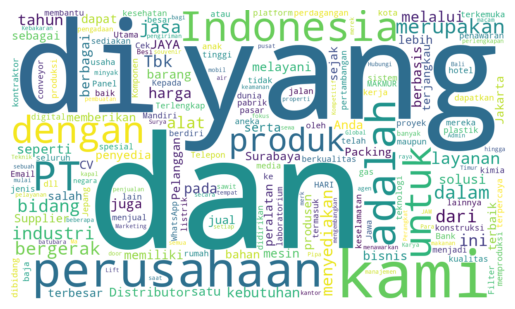

time: 4.49 s (started: 2024-06-08 08:20:54 +00:00)


In [8]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

#Importing Dataset
TXT_FILE = "output.txt"

#Creating the text variable
text = open(TXT_FILE, mode="r", encoding="utf-8").read()

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white', height=700, width=1200).generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# store to file
word_cloud.to_file("wordcloud_output.png")

### **Check for Duplication**

**nunique()** based on several unique values in each column and the data description, we can identify the continuous and categorical columns in the data. Duplicated data can be handled or removed based on further analysis

In [9]:
df.nunique()

no               4506
kategori            3
subkategori        82
location/city     348
nama             3571
deskripsi        1079
address          2469
contact          2191
url              2484
lat              2476
lng              2475
dtype: int64

time: 21.6 ms (started: 2024-06-08 08:20:59 +00:00)


### **Missing Values Calculation**

**isnull()** is widely been in all pre-processing steps to identify null values in the data

In our example, **df.isnull().sum()** is used to get the number of missing records in each column

In [10]:
df.isnull().sum()

no                  0
kategori            0
subkategori         0
location/city       0
nama                0
deskripsi        2806
address          1707
contact          1957
url              1707
lat              1707
lng              1707
dtype: int64

time: 13.1 ms (started: 2024-06-08 08:20:59 +00:00)


## **Data Reduction**

Some columns or variables can be dropped if they do not add value to our analysis.

In our dataset, the column address, contact, url, lat, lng, assuming they don’t have any predictive power to predict the dependent variable.

In [11]:
# Remove address, contact, url, lat, lng columns from df
df = df.drop(['no', 'address','contact','url','lat','lng'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4506 entries, 0 to 4505
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   kategori       4506 non-null   object
 1   subkategori    4506 non-null   object
 2   location/city  4506 non-null   object
 3   nama           4506 non-null   object
 4   deskripsi      1700 non-null   object
dtypes: object(5)
memory usage: 176.1+ KB
time: 22 ms (started: 2024-06-08 08:20:59 +00:00)


We start our Feature Engineering as we need to add some columns required for analysis.

## **Feature Engineering**

Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The main goal of Feature engineering is to create meaningful data from raw data.

We will extract relevant features from the dataset, such as kategori, subkategori, location/city, nama, and deskripsi.

In [12]:
# Selecting the relevant features for recommendation
selected_features = ['kategori','subkategori','location/city','nama','deskripsi']
print(selected_features)

['kategori', 'subkategori', 'location/city', 'nama', 'deskripsi']
time: 4.63 ms (started: 2024-06-08 08:20:59 +00:00)




---



# **3. PRE-PROCESSING DATA**

Data preprocessing is the process of transforming raw data into an understandable format. It is also an important step in data mining as we cannot work with raw data. The quality of the data should be checked before applying machine learning or data mining algorithms.

## **Data Cleaning**

Data cleaning is the process of removing incorrect data, incomplete data, and inaccurate data from the datasets, and it also replaces the missing values.

### **Removing Duplicate Data**

In [13]:
kategori_nama = df['kategori'] + ' ' + df['nama']
kategori_nama

0                               Media Partner Agrilabs.id
1                                Media Partner Agronesian
2                         Media Partner Petani Hobi Party
3                               Media Partner Ternaknesia
4                                Media Partner OKE Garden
                              ...                        
4501    Equipment/Rental Sewa Alat Camping Semarang WB...
4502                          Equipment/Rental Kafe tenda
4503    Equipment/Rental EnergyAdventure Rental Tenda ...
4504                   Equipment/Rental Warung tenda muda
4505    Equipment/Rental Grosir Tenda lipat Murah "AMI...
Length: 4506, dtype: object

time: 11.2 ms (started: 2024-06-08 08:20:59 +00:00)


In [14]:
# push to df
df = df.assign(kategori_nama=kategori_nama)
df.head()

,kategori,subkategori,location/city,nama,deskripsi,kategori_nama
0,Media Partner,Agriculture,-,Agrilabs.id,Kami sedang mengembangkan teknologi untuk memb...,Media Partner Agrilabs.id
1,Media Partner,Agriculture,-,Agronesian,Agronesian adalah perusahaan startup pertanian...,Media Partner Agronesian
2,Media Partner,Agriculture,-,Petani Hobi Party,Petani Hobi Party merupakan peternakan unggas ...,Media Partner Petani Hobi Party
3,Media Partner,Agriculture,-,Ternaknesia,Ternaknesia adalah solusi menyeluruh bagi pete...,Media Partner Ternaknesia
4,Media Partner,Agriculture,-,OKE Garden,Oke Garden adalah platform digital yang menyed...,Media Partner OKE Garden


time: 55.5 ms (started: 2024-06-08 08:20:59 +00:00)


In [15]:
df.shape

(4506, 6)

time: 4.66 ms (started: 2024-06-08 08:20:59 +00:00)


In [16]:
df.drop_duplicates(subset=['kategori_nama'], keep="first", inplace=True)

time: 3.05 ms (started: 2024-06-08 08:20:59 +00:00)


In [17]:
df.reset_index(inplace=True)

time: 1.45 ms (started: 2024-06-08 08:20:59 +00:00)


In [18]:
df.shape

(3572, 7)

time: 2.94 ms (started: 2024-06-08 08:20:59 +00:00)


In [19]:
df

,index,kategori,subkategori,location/city,nama,deskripsi,kategori_nama
0,0,Media Partner,Agriculture,-,Agrilabs.id,Kami sedang mengembangkan teknologi untuk memb...,Media Partner Agrilabs.id
1,1,Media Partner,Agriculture,-,Agronesian,Agronesian adalah perusahaan startup pertanian...,Media Partner Agronesian
2,2,Media Partner,Agriculture,-,Petani Hobi Party,Petani Hobi Party merupakan peternakan unggas ...,Media Partner Petani Hobi Party
3,3,Media Partner,Agriculture,-,Ternaknesia,Ternaknesia adalah solusi menyeluruh bagi pete...,Media Partner Ternaknesia
4,4,Media Partner,Agriculture,-,OKE Garden,Oke Garden adalah platform digital yang menyed...,Media Partner OKE Garden
...,...,...,...,...,...,...,...
3567,4501,Equipment/Rental,Tent,semarang,Sewa Alat Camping Semarang WB OUTDOOR,NaN,Equipment/Rental Sewa Alat Camping Semarang WB...
3568,4502,Equipment/Rental,Tent,semarang,Kafe tenda,NaN,Equipment/Rental Kafe tenda
3569,4503,Equipment/Rental,Tent,semarang,EnergyAdventure Rental Tenda Alat Outdoor,NaN,Equipment/Rental EnergyAdventure Rental Tenda ...
3570,4504,Equipment/Rental,Tent,semarang,Warung tenda muda,NaN,Equipment/Rental Warung tenda muda


time: 57.9 ms (started: 2024-06-08 08:20:59 +00:00)


In [20]:
# Remove kategori_nama columns from df
df = df.drop(['index', 'kategori_nama'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572 entries, 0 to 3571
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   kategori       3572 non-null   object
 1   subkategori    3572 non-null   object
 2   location/city  3572 non-null   object
 3   nama           3572 non-null   object
 4   deskripsi      1069 non-null   object
dtypes: object(5)
memory usage: 139.7+ KB
time: 14.2 ms (started: 2024-06-08 08:20:59 +00:00)


In [21]:
df.reset_index(inplace=True)
df

,index,kategori,subkategori,location/city,nama,deskripsi
0,0,Media Partner,Agriculture,-,Agrilabs.id,Kami sedang mengembangkan teknologi untuk memb...
1,1,Media Partner,Agriculture,-,Agronesian,Agronesian adalah perusahaan startup pertanian...
2,2,Media Partner,Agriculture,-,Petani Hobi Party,Petani Hobi Party merupakan peternakan unggas ...
3,3,Media Partner,Agriculture,-,Ternaknesia,Ternaknesia adalah solusi menyeluruh bagi pete...
4,4,Media Partner,Agriculture,-,OKE Garden,Oke Garden adalah platform digital yang menyed...
...,...,...,...,...,...,...
3567,3567,Equipment/Rental,Tent,semarang,Sewa Alat Camping Semarang WB OUTDOOR,NaN
3568,3568,Equipment/Rental,Tent,semarang,Kafe tenda,NaN
3569,3569,Equipment/Rental,Tent,semarang,EnergyAdventure Rental Tenda Alat Outdoor,NaN
3570,3570,Equipment/Rental,Tent,semarang,Warung tenda muda,NaN


time: 64.5 ms (started: 2024-06-08 08:20:59 +00:00)


In [22]:
df['index'] += 1
df

,index,kategori,subkategori,location/city,nama,deskripsi
0,1,Media Partner,Agriculture,-,Agrilabs.id,Kami sedang mengembangkan teknologi untuk memb...
1,2,Media Partner,Agriculture,-,Agronesian,Agronesian adalah perusahaan startup pertanian...
2,3,Media Partner,Agriculture,-,Petani Hobi Party,Petani Hobi Party merupakan peternakan unggas ...
3,4,Media Partner,Agriculture,-,Ternaknesia,Ternaknesia adalah solusi menyeluruh bagi pete...
4,5,Media Partner,Agriculture,-,OKE Garden,Oke Garden adalah platform digital yang menyed...
...,...,...,...,...,...,...
3567,3568,Equipment/Rental,Tent,semarang,Sewa Alat Camping Semarang WB OUTDOOR,NaN
3568,3569,Equipment/Rental,Tent,semarang,Kafe tenda,NaN
3569,3570,Equipment/Rental,Tent,semarang,EnergyAdventure Rental Tenda Alat Outdoor,NaN
3570,3571,Equipment/Rental,Tent,semarang,Warung tenda muda,NaN


time: 56.5 ms (started: 2024-06-08 08:20:59 +00:00)


### **Handling Missing Values**

We will replace all the missing values with null string (found 2800 missing values in deskripsi column before)

In [23]:
# Replacing the null valuess with null string
for feature in selected_features:
    df[feature] = df[feature].fillna('')

time: 5.88 ms (started: 2024-06-08 08:20:59 +00:00)


### **Remove Special Characters**

In [24]:
def cleaning(Text):
    Text = re.sub('@\S+|https?:\S+|http?:\S|[^A-Za-z0-9,.]+',' ', Text)
    return Text

df['deskripsi'] = df['deskripsi'].apply(cleaning)

time: 50.5 ms (started: 2024-06-08 08:20:59 +00:00)


In [25]:
#save final dataset
df.to_csv('dataset.csv', sep=',', index=False)

time: 35 ms (started: 2024-06-08 08:20:59 +00:00)


### **Data Integration**

We will combine 5 features that are valuable to make a machine learning algorithm

In [26]:
# combining all the 5 selected features
combined_features = df['kategori'] + ' ' + df['subkategori'] + ' ' + df['location/city'] + ' ' + df['nama'] + ' ' + df['deskripsi']
combined_features

0       Media Partner Agriculture - Agrilabs.id Kami s...
1       Media Partner Agriculture - Agronesian Agrones...
2       Media Partner Agriculture - Petani Hobi Party ...
3       Media Partner Agriculture - Ternaknesia Ternak...
4       Media Partner Agriculture - OKE Garden Oke Gar...
                              ...                        
3567    Equipment/Rental Tent semarang Sewa Alat Campi...
3568           Equipment/Rental Tent semarang Kafe tenda 
3569    Equipment/Rental Tent semarang EnergyAdventure...
3570    Equipment/Rental Tent semarang Warung tenda muda 
3571    Equipment/Rental Tent semarang Grosir Tenda li...
Length: 3572, dtype: object

time: 12 ms (started: 2024-06-08 08:20:59 +00:00)


In [27]:
# push to df
df = df.assign(combined_features=combined_features)
df

,index,kategori,subkategori,location/city,nama,deskripsi,combined_features
0,1,Media Partner,Agriculture,-,Agrilabs.id,Kami sedang mengembangkan teknologi untuk memb...,Media Partner Agriculture - Agrilabs.id Kami s...
1,2,Media Partner,Agriculture,-,Agronesian,Agronesian adalah perusahaan startup pertanian...,Media Partner Agriculture - Agronesian Agrones...
2,3,Media Partner,Agriculture,-,Petani Hobi Party,Petani Hobi Party merupakan peternakan unggas ...,Media Partner Agriculture - Petani Hobi Party ...
3,4,Media Partner,Agriculture,-,Ternaknesia,Ternaknesia adalah solusi menyeluruh bagi pete...,Media Partner Agriculture - Ternaknesia Ternak...
4,5,Media Partner,Agriculture,-,OKE Garden,Oke Garden adalah platform digital yang menyed...,Media Partner Agriculture - OKE Garden Oke Gar...
...,...,...,...,...,...,...,...
3567,3568,Equipment/Rental,Tent,semarang,Sewa Alat Camping Semarang WB OUTDOOR,,Equipment/Rental Tent semarang Sewa Alat Campi...
3568,3569,Equipment/Rental,Tent,semarang,Kafe tenda,,Equipment/Rental Tent semarang Kafe tenda
3569,3570,Equipment/Rental,Tent,semarang,EnergyAdventure Rental Tenda Alat Outdoor,,Equipment/Rental Tent semarang EnergyAdventure...
3570,3571,Equipment/Rental,Tent,semarang,Warung tenda muda,,Equipment/Rental Tent semarang Warung tenda muda


time: 68.9 ms (started: 2024-06-08 08:20:59 +00:00)


## **Case Folding**

In this step data was collected are uniform cases or letters contained in each profile. Uniformizing letters was done from capital letters converted to lowercase letters.

In [28]:
df['case_folding'] = df['combined_features'].str.lower()

time: 5.68 ms (started: 2024-06-08 08:20:59 +00:00)


## **Tokenization**

In this step, the text is split into smaller units. We can use either sentence tokenization or word tokenization based on our problem statement.

In [29]:
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

df['tokenization']= df['case_folding'].apply(tokenization)

time: 25.9 ms (started: 2024-06-08 08:20:59 +00:00)


## **Stopword Removal**

Stopwords are the commonly used words and are removed from the text as they do not add any value to the analysis. These words carry less or no meaning.

In [30]:
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&', 'yah', 'no', 'je', 'om', 'pru', 'sch',
                       'injirrr', 'ah', 'oena', 'bu', 'eh', 'n', 'anjir', 'jd', 'anj'])

list_stopwords = set(list_stopwords)

def stopwords_removal(Text):
  words = Text.split()
  return [word for word in words if word not in list_stopwords]

df['stopword_removal'] = df['case_folding'].apply(stopwords_removal)

time: 201 ms (started: 2024-06-08 08:20:59 +00:00)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Stemming**

It is also known as the text standardization step where the words are stemmed or diminished to their root/base form.  For example, words like ‘programmer’, ‘programming, ‘program’ will be stemmed to ‘program’.

In [31]:
!pip install swifter
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import swifter

#buat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#stemmed wrapper
def stemmed_wrapper(term):
  return stemmer.stem(term)

term_dict = {}

for Text in df['stopword_removal']:
  for term in Text:
    if term not in term_dict:
      term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

#memmulai stemming
def apply_stemmed_term(Text):
  return [term_dict[term] for term in Text]

df['stemming'] = df['stopword_removal'].swifter.apply(apply_stemmed_term)

Streaming output truncated to the last 5000 lines.
ritual : ritual
nikah : nikah
jin, : jin
kawin : kawin
musuh, : musuh
tumbal : tumbal
pesugihan : sugih
balik, : balik
tuyul, : tuyul
sore, : sore
bulus : bulus
jimbung, : jimbung
kandang : kandang
bubrah, : bubrah
ngujang : ngujang
tulung : tulung
tampomas : tampomas
sedulu : sedulu
psm : psm
privo : privo
sakurazy : sakurazy
medtecindo : medtecindo
panguwuh : panguwuh
terapis, : terap
pc : pc
laptop : laptop
notebook : notebook
https : https
nripsmgroup.wixsite.com : nripsmgroup wixsite com
suppliercont : suppliercont
bunaken : bunaken
tarsius : tarsius
minahasa : minahasa
berlibur : libur
melayani. : layan
objek : objek
kunjungi : kunjung
siladen, : siladen
monumen : monumen
yesus : yesus
memberkati, : kati
andalusia : andalusia
scientifica : scientifica
edelweiss : edelweiss
merapi, : rapi
sereh : sereh
wangi : wangi
merapi : rapi
valley, : valley
menembak : tembak
rudal : rudal
sasaran : sasar
terbang, : terbang
riset, : riset
out

Pandas Apply:   0%|          | 0/3572 [00:00<?, ?it/s]

time: 20min 59s (started: 2024-06-08 08:21:00 +00:00)


In [32]:
# stemming
stemming = df[['stemming']]

def fit_stemming(text):
    text = np.array(text)
    text = ' '.join(text)

    return text

df['stemming'] = df['stemming'].apply(lambda x: fit_stemming(x))
df.head()

,index,kategori,subkategori,location/city,nama,deskripsi,combined_features,case_folding,tokenization,stopword_removal,stemming
0,1,Media Partner,Agriculture,-,Agrilabs.id,Kami sedang mengembangkan teknologi untuk memb...,Media Partner Agriculture - Agrilabs.id Kami s...,media partner agriculture - agrilabs.id kami s...,[media partner agriculture - agrilabs.id kami ...,"[media, partner, agriculture, -, agrilabs.id, ...",media partner agriculture - agrilabs id kemban...
1,2,Media Partner,Agriculture,-,Agronesian,Agronesian adalah perusahaan startup pertanian...,Media Partner Agriculture - Agronesian Agrones...,media partner agriculture - agronesian agrones...,[media partner agriculture - agronesian agrone...,"[media, partner, agriculture, -, agronesian, a...",media partner agriculture - agronesian agrones...
2,3,Media Partner,Agriculture,-,Petani Hobi Party,Petani Hobi Party merupakan peternakan unggas ...,Media Partner Agriculture - Petani Hobi Party ...,media partner agriculture - petani hobi party ...,[media partner agriculture - petani hobi party...,"[media, partner, agriculture, -, petani, hobi,...",media partner agriculture - tani hobi party ta...
3,4,Media Partner,Agriculture,-,Ternaknesia,Ternaknesia adalah solusi menyeluruh bagi pete...,Media Partner Agriculture - Ternaknesia Ternak...,media partner agriculture - ternaknesia ternak...,[media partner agriculture - ternaknesia terna...,"[media, partner, agriculture, -, ternaknesia, ...",media partner agriculture - ternaknesia ternak...
4,5,Media Partner,Agriculture,-,OKE Garden,Oke Garden adalah platform digital yang menyed...,Media Partner Agriculture - OKE Garden Oke Gar...,media partner agriculture - oke garden oke gar...,[media partner agriculture - oke garden oke ga...,"[media, partner, agriculture, -, oke, garden, ...",media partner agriculture - oke garden oke gar...


time: 209 ms (started: 2024-06-08 08:41:59 +00:00)


In [33]:
#save processed data
df['stemming'].to_csv('datamodel.csv', sep=',', index=False)

time: 22.3 ms (started: 2024-06-08 08:41:59 +00:00)


# **4. BUILDING CONTENT-BASED RECOMMENDATION SYSTEMS (CBRS)**

In [34]:
dfclean = pd.read_csv('/content/datamodel.csv')
dfclean.head()

,stemming
0,media partner agriculture - agrilabs id kemban...
1,media partner agriculture - agronesian agrones...
2,media partner agriculture - tani hobi party ta...
3,media partner agriculture - ternaknesia ternak...
4,media partner agriculture - oke garden oke gar...


time: 25.5 ms (started: 2024-06-08 08:41:59 +00:00)


## **Term Frequency**

The term is frequency measure of a word w in a document (text) d. It is equal to the number of instances of word w in document d divided by the total number of words in document d. Term frequency serves as a metric to determine a word’s occurrence in a document as compared to the total number of words in a document. The denominator is always the same.

### **TF-IDF**

We use TF-IDF (Term Frequency-Inverse Document Frequency) vectorization to convert text features (descriptions) into numerical vectors.
TF-IDF gives more weight to terms that are important in a specific document and less weight to common terms.

In [35]:
# converting the text data to feature vectors
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(dfclean['stemming'])

time: 124 ms (started: 2024-06-08 08:41:59 +00:00)


In [36]:
print(tfidf_matrix)

  (0, 5840)	0.17254659703359743
  (0, 9240)	0.1635362395147648
  (0, 5063)	0.09053110798313432
  (0, 7168)	0.15064476826545017
  (0, 9185)	0.21380110936236849
  (0, 5072)	0.1696567213520084
  (0, 4527)	0.15064476826545017
  (0, 7016)	0.2328130624489267
  (0, 3658)	0.20768062752512487
  (0, 2772)	0.175777203189252
  (0, 5273)	0.15064476826545017
  (0, 1677)	0.2328130624489267
  (0, 9223)	0.17411436375458347
  (0, 6924)	0.19845171546000742
  (0, 10013)	0.20768062752512487
  (0, 6763)	0.2328130624489267
  (0, 7841)	0.2328130624489267
  (0, 2410)	0.324920952255983
  (0, 5758)	0.18866867443856664
  (0, 5396)	0.16142531741249103
  (0, 9810)	0.07772596520302875
  (0, 2198)	0.2682887228160641
  (0, 9313)	0.14241336432593277
  (0, 5431)	0.12191843114057264
  (0, 4734)	0.10048983223409368
  :	:
  (3568, 8543)	0.33275328539827986
  (3569, 3771)	0.6773547845505306
  (3569, 9364)	0.2651979922134553
  (3569, 7060)	0.4114404312241664
  (3569, 8061)	0.2158984295509058
  (3569, 3800)	0.1080764389243205

### **TF-RF**

To implement **Term Frequency-Reversed Frequency (TF-RF)** vectorization, we need to modify the typical TF-IDF approach. In TF-RF, the document frequency is replaced by the "reversed frequency," which measures how often a term does not appear in documents. This can highlight terms that are rare in the dataset overall, but frequent in specific documents.

In [37]:
# Step 1: Calculate Term Frequency (TF)
count_vectorizer = CountVectorizer()
term_counts = count_vectorizer.fit_transform(dfclean['stemming'])

# Convert to array for easier manipulation
term_counts_array = term_counts.toarray()

# Step 2: Calculate Reversed Frequency (RF)
num_docs = term_counts_array.shape[0]
term_presence = term_counts_array > 0
doc_freq = np.sum(term_presence, axis=0)
rev_freq = np.log(num_docs / (doc_freq + 1))  # Add 1 to avoid division by zero

# Step 3: Calculate TF-RF
tf_rf = term_counts_array * rev_freq

# Convert to sparse matrix format (similar to tfidf_matrix)
from scipy.sparse import csr_matrix
tfrf_matrix = csr_matrix(tf_rf)

# Print the resulting TF-RF matrix
print(tfrf_matrix)

  (0, 1552)	4.625532880506976
  (0, 1553)	7.487733761436444
  (0, 1677)	7.487733761436444
  (0, 2198)	7.780843001695997
  (0, 2410)	9.845568807949816
  (0, 2772)	5.408292219756609
  (0, 3658)	6.571443029562289
  (0, 4527)	4.492001487882454
  (0, 4734)	2.663428045531682
  (0, 5063)	2.300347955595689
  (0, 5072)	5.185148668442399
  (0, 5273)	4.492001487882454
  (0, 5396)	4.88504407599206
  (0, 5431)	3.4446824936018943
  (0, 5758)	5.878295849002344
  (0, 5840)	5.290509184100225
  (0, 6375)	2.575078875700392
  (0, 6763)	7.487733761436444
  (0, 6924)	6.234970792941076
  (0, 7016)	7.487733761436444
  (0, 7168)	4.492001487882454
  (0, 7227)	2.810242913868727
  (0, 7841)	7.487733761436444
  (0, 9185)	6.794586580876499
  (0, 9223)	5.347667597940173
  :	:
  (3568, 9364)	2.3229477875129305
  (3569, 1657)	2.782718240478637
  (3569, 3771)	7.487733761436444
  (3569, 3800)	0.3540388438380963
  (3569, 7060)	4.155529251261241
  (3569, 8061)	0.7048891656776093
  (3569, 8543)	2.212173382011024
  (3569, 9

### **TF-ABS**

To implement **Term Frequency-Absolute Frequency (TF-ABS)** vectorization, we need to adjust the typical TF-IDF approach. In TF-ABS, we combine the term frequency (TF) with the absolute frequency (ABS) which is simply the raw count of terms in the entire corpus.

In [38]:
# Step 1: Calculate Term Frequency (TF)
count_vectorizer = CountVectorizer()
term_counts = count_vectorizer.fit_transform(dfclean['stemming'])

# Convert to array for easier manipulation
term_counts_array = term_counts.toarray()

# Step 2: Calculate Absolute Frequency (ABS)
abs_freq = np.sum(term_counts_array, axis=0)

# Step 3: Combine TF and ABS
# Option 1: Use term frequency directly with absolute frequency
tf_abs = term_counts_array * abs_freq

# Convert to sparse matrix format (similar to tfidf_matrix)
from scipy.sparse import csr_matrix
tfabs_matrix = csr_matrix(tf_abs)

# Print the resulting TF-ABS matrix
print(tfabs_matrix)

  (0, 1552)	34
  (0, 1553)	1
  (0, 1677)	1
  (0, 2198)	162
  (0, 2410)	66
  (0, 2772)	18
  (0, 3658)	4
  (0, 4527)	43
  (0, 4734)	370
  (0, 5063)	397
  (0, 5072)	19
  (0, 5273)	45
  (0, 5396)	39
  (0, 5431)	158
  (0, 5758)	13
  (0, 5840)	19
  (0, 6375)	327
  (0, 6763)	1
  (0, 6924)	12
  (0, 7016)	1
  (0, 7168)	41
  (0, 7227)	215
  (0, 7841)	1
  (0, 9185)	5
  (0, 9223)	16
  :	:
  (3568, 9364)	357
  (3569, 1657)	324
  (3569, 3771)	1
  (3569, 3800)	2523
  (3569, 7060)	59
  (3569, 8061)	5268
  (3569, 8543)	515
  (3569, 9353)	276
  (3569, 9364)	357
  (3570, 3800)	2523
  (3570, 6673)	16
  (3570, 8061)	2634
  (3570, 8543)	515
  (3570, 9353)	276
  (3570, 9364)	357
  (3570, 10000)	3
  (3571, 1747)	3
  (3571, 3800)	2523
  (3571, 4409)	23
  (3571, 6011)	30
  (3571, 6723)	101
  (3571, 8061)	2634
  (3571, 8543)	515
  (3571, 9353)	276
  (3571, 9364)	714
time: 656 ms (started: 2024-06-08 08:42:00 +00:00)


### **TF-PDF**

To implement Term Frequency-Probabilistic Document Frequency (TF-PDF) vectorization, we need to modify the typical TF-IDF approach. In TF-PDF, the inverse document frequency (IDF) is replaced by the probabilistic document frequency (PDF), which is computed differently to emphasize the probability-based weighting of terms.

In [39]:
# Step 1: Calculate Term Frequency (TF)
count_vectorizer = CountVectorizer()
term_counts = count_vectorizer.fit_transform(dfclean['stemming'])

# Convert to array for easier manipulation
term_counts_array = term_counts.toarray()

# Step 2: Calculate Document Frequency (DF)
num_docs = term_counts_array.shape[0]
term_presence = term_counts_array > 0
doc_freq = np.sum(term_presence, axis=0)

# Step 3: Calculate Probabilistic Document Frequency (PDF)
pdf = np.log((num_docs - doc_freq + 1) / (doc_freq + 1))  # Add 1 to avoid division by zero

# Step 4: Calculate TF-PDF
tf_pdf = term_counts_array * pdf

# Convert to sparse matrix format (similar to tfidf_vectors)
from scipy.sparse import csr_matrix
tfpdf_matrix = csr_matrix(tf_pdf)

# Print the resulting TF-PDF vectors
print(tfpdf_matrix)

  (0, 1552)	4.6162514188560495
  (0, 1553)	7.487733761436444
  (0, 1677)	7.487733761436444
  (0, 2198)	7.740688959612549
  (0, 2410)	9.832085610815977
  (0, 2772)	5.404365145986
  (0, 3658)	6.57060281105606
  (0, 4527)	4.481306198765705
  (0, 4734)	2.591772056625247
  (0, 5063)	2.1953606438981565
  (0, 5072)	5.180096735160606
  (0, 5273)	4.481306198765705
  (0, 5396)	4.878020588769293
  (0, 5431)	3.4128254196572745
  (0, 5758)	5.876053695596654
  (0, 5840)	5.28601983873763
  (0, 6375)	2.496481558184076
  (0, 6763)	7.487733761436444
  (0, 6924)	6.233570036303578
  (0, 7016)	7.487733761436444
  (0, 7168)	4.481306198765705
  (0, 7227)	2.7487605614846298
  (0, 7841)	7.487733761436444
  (0, 9185)	6.794026513653794
  (0, 9223)	5.343459427892239
  :	:
  (3568, 9364)	2.22044494914306
  (3569, 1657)	2.7194480449484755
  (3569, 3771)	7.487733761436444
  (3569, 3800)	-0.8542358468565401
  (3569, 7060)	4.140296234562355
  (3569, 8061)	-1.7191719616312742
  (3569, 8543)	2.096871867296727
  (3569, 9

## **Similarity Scores**

**Similarity Scores** are based on comparing one data object with another, attribute by attribute, usually summing the squares of the differences in magnitude for each attribute, and using the calculation to compute a final outcome, known as the correlation score.

### **Cosine Similarity**

From this, we can compute a user-user similarity between two users using the cosine similarity formula.

Cosine similarity means the similarity between two vectors of inner product space. It is measured by the cosine of the angle between two non-zero vectors and is used to determine how similar two items are based on their feature vectors.

In [40]:
# getting the similarity scores using cosine similarity with TF-IDF matrix
tfidf_cosine = cosine_similarity(tfidf_matrix, tfidf_matrix)

time: 301 ms (started: 2024-06-08 08:42:01 +00:00)


In [41]:
print(tfidf_cosine)

[[1.         0.13948797 0.07967842 ... 0.         0.         0.        ]
 [0.13948797 1.         0.14422584 ... 0.         0.         0.        ]
 [0.07967842 0.14422584 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.26348082 0.27441515]
 [0.         0.         0.         ... 0.26348082 1.         0.27084403]
 [0.         0.         0.         ... 0.27441515 0.27084403 1.        ]]
time: 3.9 ms (started: 2024-06-08 08:42:02 +00:00)


In [42]:
# getting the similarity scores using cosine similarity with TF-RF matrix
tfrf_cosine = cosine_similarity(tfrf_matrix, tfrf_matrix)

time: 314 ms (started: 2024-06-08 08:42:02 +00:00)


In [43]:
print(tfrf_cosine)

[[1.         0.12813746 0.07236494 ... 0.         0.         0.        ]
 [0.12813746 1.         0.13405841 ... 0.         0.         0.        ]
 [0.07236494 0.13405841 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.17819202 0.19619166]
 [0.         0.         0.         ... 0.17819202 1.         0.19306224]
 [0.         0.         0.         ... 0.19619166 0.19306224 1.        ]]
time: 1.45 ms (started: 2024-06-08 08:42:02 +00:00)


In [44]:
# getting the similarity scores using cosine similarity with TF-ABS matrix
tfabs_cosine = cosine_similarity(tfabs_matrix, tfabs_matrix)

time: 245 ms (started: 2024-06-08 08:42:02 +00:00)


In [45]:
print(tfabs_cosine)

[[1.         0.5750044  0.12175231 ... 0.         0.         0.        ]
 [0.5750044  1.         0.58989647 ... 0.         0.         0.        ]
 [0.12175231 0.58989647 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.94742951 0.9399197 ]
 [0.         0.         0.         ... 0.94742951 1.         0.99511104]
 [0.         0.         0.         ... 0.9399197  0.99511104 1.        ]]
time: 2.46 ms (started: 2024-06-08 08:42:02 +00:00)


In [46]:
# getting the similarity scores using cosine similarity with TF-PDF matrix
tfpdf_cosine = cosine_similarity(tfpdf_matrix, tfpdf_matrix)

time: 253 ms (started: 2024-06-08 08:42:02 +00:00)


In [47]:
print(tfpdf_cosine)

[[1.         0.12692242 0.07180266 ... 0.         0.         0.        ]
 [0.12692242 1.         0.13316527 ... 0.         0.         0.        ]
 [0.07180266 0.13316527 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.18216037 0.19653046]
 [0.         0.         0.         ... 0.18216037 1.         0.18959233]
 [0.         0.         0.         ... 0.19653046 0.18959233 1.        ]]
time: 1.3 ms (started: 2024-06-08 08:42:03 +00:00)


### **Jaccard Similarity**

Calculates the Jaccard similarity for the binary representation of the TF-IDF matrix, which measures the similarity between sets.

In [48]:
# getting the similarity scores using jaccard similarity with TF-IDF matrix
tfidf_binary = (tfidf_matrix > 0).astype(int)
jaccard_distances = pdist(tfidf_binary.toarray(), metric='jaccard')
tfidf_jaccard = 1 - squareform(jaccard_distances)
np.fill_diagonal(tfidf_jaccard, 1.0)

time: 4min 10s (started: 2024-06-08 08:42:03 +00:00)


In [49]:
print(tfidf_jaccard)

[[1.         0.14285714 0.07272727 ... 0.         0.         0.        ]
 [0.14285714 1.         0.11363636 ... 0.         0.         0.        ]
 [0.07272727 0.11363636 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.5        0.41666667]
 [0.         0.         0.         ... 0.5        1.         0.45454545]
 [0.         0.         0.         ... 0.41666667 0.45454545 1.        ]]
time: 2.24 ms (started: 2024-06-08 08:46:13 +00:00)


In [50]:
# getting the similarity scores using jaccard similarity with TF-RF matrix
tfrf_binary = (tfrf_matrix > 0).astype(int)
jaccard_distances = pdist(tfrf_binary.toarray(), metric='jaccard')
tfrf_jaccard = 1 - squareform(jaccard_distances)
np.fill_diagonal(tfrf_jaccard, 1.0)

time: 4min 8s (started: 2024-06-08 08:46:13 +00:00)


In [51]:
print(tfrf_jaccard)

[[1.         0.14285714 0.07272727 ... 0.         0.         0.        ]
 [0.14285714 1.         0.11363636 ... 0.         0.         0.        ]
 [0.07272727 0.11363636 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.5        0.41666667]
 [0.         0.         0.         ... 0.5        1.         0.45454545]
 [0.         0.         0.         ... 0.41666667 0.45454545 1.        ]]
time: 1.41 ms (started: 2024-06-08 08:50:22 +00:00)


In [52]:
# getting the similarity scores using jaccard similarity with TF-ABS matrix
tfabs_binary = (tfabs_matrix > 0).astype(int)
jaccard_distances = pdist(tfabs_binary.toarray(), metric='jaccard')
tfabs_jaccard = 1 - squareform(jaccard_distances)
np.fill_diagonal(tfabs_jaccard, 1.0)

time: 3min 49s (started: 2024-06-08 08:50:22 +00:00)


In [53]:
print(tfabs_jaccard)

[[1.         0.14285714 0.07272727 ... 0.         0.         0.        ]
 [0.14285714 1.         0.11363636 ... 0.         0.         0.        ]
 [0.07272727 0.11363636 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.5        0.41666667]
 [0.         0.         0.         ... 0.5        1.         0.45454545]
 [0.         0.         0.         ... 0.41666667 0.45454545 1.        ]]
time: 1.76 ms (started: 2024-06-08 08:54:11 +00:00)


In [54]:
# getting the similarity scores using jaccard similarity with TF-PDF matrix
tfpdf_binary = (tfpdf_matrix > 0).astype(int)
jaccard_distances = pdist(tfpdf_binary.toarray(), metric='jaccard')
tfpdf_jaccard = 1 - squareform(jaccard_distances)
np.fill_diagonal(tfpdf_jaccard, 1.0)

time: 3min 50s (started: 2024-06-08 08:54:11 +00:00)


In [55]:
print(tfpdf_jaccard)

[[1.         0.14285714 0.07272727 ... 0.         0.         0.        ]
 [0.14285714 1.         0.11363636 ... 0.         0.         0.        ]
 [0.07272727 0.11363636 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.375      0.3       ]
 [0.         0.         0.         ... 0.375      1.         0.33333333]
 [0.         0.         0.         ... 0.3        0.33333333 1.        ]]
time: 2.31 ms (started: 2024-06-08 08:58:01 +00:00)


# **5. TEST RECOMMENDATION SYSTEMS**

Store recommendations for each scenario

In [56]:
# SCENARIO 1

def get_recommendations_1(index, tfidf_cosine, df):
    # Mendapatkan skor similarity untuk produk yang diberikan
    sim_services_1 = list(enumerate(tfidf_cosine[index]))

    # Mengurutkan produk berdasarkan skor similarity tertinggi
    sim_services_1 = sorted(sim_services_1, key=lambda x: x[1], reverse=True)

    # Mendapatkan indeks dari 10 produk teratas (mengabaikan produk itu sendiri)
    sim_services_1 = sim_services_1[1:11]

    # Mengembalikan 10 produk teratas
    top_indices_1 = [i[0] for i in sim_services_1]
    return df.iloc[top_indices_1][['kategori', 'subkategori', 'location/city', 'nama', 'deskripsi']]

# Example: Get recommendations for a specific business index
index_input = 615
top_10_recommendations_1 = get_recommendations_1(index_input, tfidf_cosine, df)
print(f"Layanan yang dipilih: {df.iloc[index_input]['nama']}")
print("10 Rekomendasi:")
print(top_10_recommendations_1)

Layanan yang dipilih: PT. Jokung Indonusa Semesta
10 Rekomendasi:
     kategori                 subkategori  \
546   Sponsor                   Utilities   
601   Sponsor           Alat Rumah Tangga   
600   Sponsor           Alat Rumah Tangga   
882   Sponsor                       Mesin   
735   Sponsor                          IT   
602   Sponsor           Alat Rumah Tangga   
604   Sponsor           Alat Rumah Tangga   
409   Sponsor      Miscellaneous Industry   
1007  Sponsor                    Properti   
713   Sponsor  Hiburan & Destinasi Wisata   

                                          location/city  \
546                                       www.pln.co.id   
601                                                   -   
600                                                   -   
882                                                   -   
735                                                   -   
602                                                   -   
604                      

In [57]:
# SCENARIO 2

def get_recommendations_2(index, tfrf_cosine, df):
    # Mendapatkan skor similarity untuk produk yang diberikan
    sim_services_2 = list(enumerate(tfrf_cosine[index]))

    # Mengurutkan produk berdasarkan skor similarity tertinggi
    sim_services_2 = sorted(sim_services_2, key=lambda x: x[1], reverse=True)

    # Mendapatkan indeks dari 10 produk teratas (mengabaikan produk itu sendiri)
    sim_services_2 = sim_services_2[1:11]

    # Mengembalikan 10 produk teratas
    top_indices_2 = [i[0] for i in sim_services_2]
    return df.iloc[top_indices_2][['kategori', 'subkategori', 'location/city', 'nama', 'deskripsi']]

# Example: Get recommendations for a specific business index
index_input = 665
top_10_recommendations_2 = get_recommendations_2(index_input, tfrf_cosine, df)
print(f"Layanan yang dipilih: {df.iloc[index_input]['nama']}")
print("10 Rekomendasi:")
print(top_10_recommendations_2)

Layanan yang dipilih: CV. Warisan Nusantara Indoraya
10 Rekomendasi:
              kategori              subkategori location/city  \
1258  Equipment/Rental           Wedding Vendor      Makassar   
1023           Sponsor             Transportasi             -   
672            Sponsor  Bahan Makanan & Minuman             -   
662            Sponsor  Bahan Makanan & Minuman             -   
787            Sponsor                  Kemasan             -   
2687  Equipment/Rental                 Printing      makassar   
211      Media Partner                Utilities             -   
1096  Equipment/Rental           Wedding Vendor      Surabaya   
849            Sponsor          Kreatif & Event             -   
669            Sponsor  Bahan Makanan & Minuman             -   

                               nama  \
1258     Cv Mawar Wedding Organizer   
1023  PT. Mahkota Logistik Indoraya   
672         CV. Orientasi Nusantara   
662        PT. Clio Surya Cemerlang   
787   PT. Lazfani Nu

In [58]:
# SCENARIO 3

def get_recommendations_3(index, tfabs_cosine, df):
    # Mendapatkan skor similarity untuk produk yang diberikan
    sim_services_3 = list(enumerate(tfabs_cosine[index]))

    # Mengurutkan produk berdasarkan skor similarity tertinggi
    sim_services_3 = sorted(sim_services_3, key=lambda x: x[1], reverse=True)

    # Mendapatkan indeks dari 10 produk teratas (mengabaikan produk itu sendiri)
    sim_services_3 = sim_services_3[1:11]

    # Mengembalikan 10 produk teratas
    top_indices_3 = [i[0] for i in sim_services_3]
    return df.iloc[top_indices_3][['kategori', 'subkategori', 'location/city', 'nama', 'deskripsi']]

# Example: Get recommendations for a specific business index
index_input = 665
top_10_recommendations_3 = get_recommendations_3(index_input, tfabs_cosine, df)
print(f"Layanan yang dipilih: {df.iloc[index_input]['nama']}")
print("10 Rekomendasi:")
print(top_10_recommendations_3)

Layanan yang dipilih: CV. Warisan Nusantara Indoraya
10 Rekomendasi:
    kategori                         subkategori location/city  \
639  Sponsor                      Bahan Bangunan             -   
949  Sponsor                 Pakaian & Aksesoris             -   
667  Sponsor             Bahan Makanan & Minuman             -   
927  Sponsor                         Outsourcing             -   
921  Sponsor             Otomotif & Transportasi             -   
610  Sponsor                   Alat Rumah Tangga             -   
897  Sponsor  Olahraga, Mainan & Perlengkapannya             -   
663  Sponsor             Bahan Makanan & Minuman             -   
664  Sponsor             Bahan Makanan & Minuman             -   
971  Sponsor              Pelatihan & Pendidikan             -   

                                                  nama  \
639                        CV. Sumber Makmur Cemerlang   
949                      CV. Asia Talisindo Industries   
667                           

In [59]:
# SCENARIO 4

def get_recommendations_4(index, tfpdf_cosine, df):
    # Mendapatkan skor similarity untuk produk yang diberikan
    sim_services_4 = list(enumerate(tfpdf_cosine[index]))

    # Mengurutkan produk berdasarkan skor similarity tertinggi
    sim_services_4 = sorted(sim_services_4, key=lambda x: x[1], reverse=True)

    # Mendapatkan indeks dari 10 produk teratas (mengabaikan produk itu sendiri)
    sim_services_4 = sim_services_4[1:11]

    # Mengembalikan 10 produk teratas
    top_indices_4 = [i[0] for i in sim_services_4]
    return df.iloc[top_indices_4][['kategori', 'subkategori', 'location/city', 'nama', 'deskripsi']]

# Example: Get recommendations for a specific business index
index_input = 665
top_10_recommendations_4 = get_recommendations_4(index_input, tfpdf_cosine, df)
print(f"Layanan yang dipilih: {df.iloc[index_input]['nama']}")
print("10 Rekomendasi:")
print(top_10_recommendations_4)

Layanan yang dipilih: CV. Warisan Nusantara Indoraya
10 Rekomendasi:
              kategori              subkategori location/city  \
1258  Equipment/Rental           Wedding Vendor      Makassar   
1023           Sponsor             Transportasi             -   
672            Sponsor  Bahan Makanan & Minuman             -   
662            Sponsor  Bahan Makanan & Minuman             -   
787            Sponsor                  Kemasan             -   
2687  Equipment/Rental                 Printing      makassar   
211      Media Partner                Utilities             -   
1096  Equipment/Rental           Wedding Vendor      Surabaya   
849            Sponsor          Kreatif & Event             -   
669            Sponsor  Bahan Makanan & Minuman             -   

                               nama  \
1258     Cv Mawar Wedding Organizer   
1023  PT. Mahkota Logistik Indoraya   
672         CV. Orientasi Nusantara   
662        PT. Clio Surya Cemerlang   
787   PT. Lazfani Nu

In [60]:
# SCENARIO 5

def get_recommendations_5(index, tfidf_jaccard, df):
    # Mendapatkan skor similarity untuk produk yang diberikan
    sim_services_5 = list(enumerate(tfidf_jaccard[index]))

    # Mengurutkan produk berdasarkan skor similarity tertinggi
    sim_services_5 = sorted(sim_services_5, key=lambda x: x[1], reverse=True)

    # Mendapatkan indeks dari 10 produk teratas (mengabaikan produk itu sendiri)
    sim_services_5 = sim_services_5[1:11]

    # Mengembalikan 10 produk teratas
    top_indices_5 = [i[0] for i in sim_services_5]
    return df.iloc[top_indices_5][['kategori', 'subkategori', 'location/city', 'nama', 'deskripsi']]

# Example: Get recommendations for a specific business index
index_input = 665
top_10_recommendations_5 = get_recommendations_5(index_input, tfidf_jaccard, df)
print(f"Layanan yang dipilih: {df.iloc[index_input]['nama']}")
print("10 Rekomendasi:")
print(top_10_recommendations_5)

Layanan yang dipilih: CV. Warisan Nusantara Indoraya
10 Rekomendasi:
    kategori              subkategori location/city  \
669  Sponsor  Bahan Makanan & Minuman             -   
662  Sponsor  Bahan Makanan & Minuman             -   
949  Sponsor      Pakaian & Aksesoris             -   
948  Sponsor      Pakaian & Aksesoris             -   
672  Sponsor  Bahan Makanan & Minuman             -   
667  Sponsor  Bahan Makanan & Minuman             -   
649  Sponsor              Bahan Kimia             -   
610  Sponsor        Alat Rumah Tangga             -   
663  Sponsor  Bahan Makanan & Minuman             -   
674  Sponsor  Bahan Makanan & Minuman             -   

                              nama  \
669      PT. Torani Berkah Mandiri   
662       PT. Clio Surya Cemerlang   
949  CV. Asia Talisindo Industries   
948     PT. Edpack Karunia Persada   
672        CV. Orientasi Nusantara   
667         CV. Freysea Indo Citra   
649        PT. Petrosorb Indonesia   
610     CV. INDUS CHE

# **6. FULL RECOMMENDATION SYSTEMS**

This function takes an item index and a similarity matrix to generate the top 10 recommendations by sorting items based on their similarity scores.

In [66]:
# Recommendation function
def get_recommendations(index, similarity_matrix):
    sim_services = list(enumerate(similarity_matrix[index]))
    sim_services = sorted(sim_services, key=lambda x: x[1], reverse=True)
    sim_services = sim_services[1:11]
    top_indices = [i[0] for i in sim_services]
    return df.iloc[top_indices][['kategori', 'subkategori', 'location/city', 'nama', 'deskripsi']]

time: 1.26 ms (started: 2024-06-08 08:58:05 +00:00)


This dictionary maps each scenario name to its corresponding similarity matrix.

In [67]:
# Define scenarios
scenarios = {
    'TF-IDF & Cosine': tfidf_cosine,
    'TF-RF & Cosine': tfrf_cosine,
    'TF-ABS & Cosine': tfabs_cosine,
    'TF-PDF & Cosine': tfpdf_cosine,
    'TF-IDF & Jaccard': tfidf_jaccard
}

time: 651 µs (started: 2024-06-08 08:58:05 +00:00)


This loop iterates through each scenario, generates recommendations for a specific input index, and prints the results.

In [68]:
index_input = 600

# Store recommendations for each scenario
recommendations = {}

for name, sim_matrix in scenarios.items():
    recommendations[name] = get_recommendations(index_input, sim_matrix)
    print(f"Scenario: {name}")
    print(f"Layanan yang dipilih: {df.iloc[index_input]['nama']}")
    print("10 Rekomendasi:")
    print(recommendations[name])
    print("\n")

Scenario: TF-IDF & Cosine
Layanan yang dipilih: PT. Citra Elektrindo Mandiri
10 Rekomendasi:
    kategori                 subkategori  location/city  \
615  Sponsor           Alat Rumah Tangga              -   
882  Sponsor                       Mesin              -   
735  Sponsor                          IT              -   
546  Sponsor                   Utilities  www.pln.co.id   
928  Sponsor                 Outsourcing              -   
606  Sponsor           Alat Rumah Tangga              -   
713  Sponsor  Hiburan & Destinasi Wisata              -   
599  Sponsor           Alat Rumah Tangga              -   
827  Sponsor  Konsultan & Layanan Bisnis              -   
601  Sponsor           Alat Rumah Tangga              -   

                                nama  \
615      PT. Jokung Indonusa Semesta   
882       PT. SURYA LISTRIK ELEKTRIK   
735        PT. Quinratu Karya Prisma   
546  Perusahaan Listrik Negara (SOE)   
928             PT. ADI RAYA MANDIRI   
606              

# **7. EVALUATION**

This function calculates the diversity of recommendations by computing the average similarity between item pairs and subtracting it from 1.

In [61]:
# SCENARIO 1

def diversity_1(recommended_items_list_1, item_features_1):
    total_similarity = 0
    total_pairs = 0

    for recommended_items in recommended_items_list_1:
        # Calculate pairwise cosine similarities for the recommended items
        similarities = cosine_similarity([item_features_1[item] for item in recommended_items])
        # Sum the similarities for all item pairs
        total_similarity += np.sum(similarities) - np.trace(similarities)  # Exclude the diagonal
        # Count the total number of item pairs
        total_pairs += len(recommended_items) * (len(recommended_items) - 1)

    # Calculate the average similarity between item pairs
    avg_similarity = total_similarity / total_pairs if total_pairs > 0 else 0
    # Calculate the diversity by subtracting the average similarity from 1
    diversity_1 = 1 - avg_similarity
    return diversity_1

# For diversity evaluation, we'll use the TF-IDF matrix directly
recommended_items_list_1 = [top_10_recommendations_1.index.tolist()]

# Create item features dictionary using the TF-IDF vectors
item_features_1 = {idx: tfidf_matrix[idx].toarray()[0] for idx in range(len(dfclean))}

# Calculate diversity of the recommendations
diversity_value = diversity_1(recommended_items_list_1, item_features_1)
print(f"Diversity: {diversity_value:.2f}")

Diversity: 0.85
time: 557 ms (started: 2024-06-08 08:58:02 +00:00)


In [62]:
# SCENARIO 2

def diversity_2(recommended_items_list_2, item_features_2):
    total_similarity = 0
    total_pairs = 0

    for recommended_items in recommended_items_list_2:
        # Calculate pairwise cosine similarities for the recommended items
        similarities = cosine_similarity([item_features_2[item] for item in recommended_items])
        # Sum the similarities for all item pairs
        total_similarity += np.sum(similarities) - np.trace(similarities)  # Exclude the diagonal
        # Count the total number of item pairs
        total_pairs += len(recommended_items) * (len(recommended_items) - 1)

    # Calculate the average similarity between item pairs
    avg_similarity = total_similarity / total_pairs if total_pairs > 0 else 0
    # Calculate the diversity by subtracting the average similarity from 1
    diversity_2 = 1 - avg_similarity
    return diversity_2

# For diversity evaluation, we'll use the TF-IDF matrix directly
recommended_items_list_2 = [top_10_recommendations_2.index.tolist()]

# Create item features dictionary using the TF-IDF vectors
item_features_2 = {idx: tfrf_matrix[idx].toarray()[0] for idx in range(len(dfclean))}

# Calculate diversity of the recommendations
diversity_value = diversity_2(recommended_items_list_2, item_features_2)
print(f"Diversity: {diversity_value:.2f}")

Diversity: 0.95
time: 561 ms (started: 2024-06-08 08:58:03 +00:00)


In [63]:
# SCENARIO 3

def diversity_3(recommended_items_list_3, item_features_3):
    total_similarity = 0
    total_pairs = 0

    for recommended_items in recommended_items_list_3:
        # Calculate pairwise cosine similarities for the recommended items
        similarities = cosine_similarity([item_features_3[item] for item in recommended_items])
        # Sum the similarities for all item pairs
        total_similarity += np.sum(similarities) - np.trace(similarities)  # Exclude the diagonal
        # Count the total number of item pairs
        total_pairs += len(recommended_items) * (len(recommended_items) - 1)

    # Calculate the average similarity between item pairs
    avg_similarity = total_similarity / total_pairs if total_pairs > 0 else 0
    # Calculate the diversity by subtracting the average similarity from 1
    diversity_3 = 1 - avg_similarity
    return diversity_3

# For diversity evaluation, we'll use the TF-IDF matrix directly
recommended_items_list_3 = [top_10_recommendations_3.index.tolist()]

# Create item features dictionary using the TF-IDF vectors
item_features_3 = {idx: tfabs_matrix[idx].toarray()[0] for idx in range(len(dfclean))}

# Calculate diversity of the recommendations
diversity_value = diversity_3(recommended_items_list_3, item_features_3)
print(f"Diversity: {diversity_value:.2f}")

Diversity: 0.09
time: 596 ms (started: 2024-06-08 08:58:03 +00:00)


In [64]:
# SCENARIO 4

def diversity_4(recommended_items_list_4, item_features_4):
    total_similarity = 0
    total_pairs = 0

    for recommended_items in recommended_items_list_4:
        # Calculate pairwise cosine similarities for the recommended items
        similarities = cosine_similarity([item_features_4[item] for item in recommended_items])
        # Sum the similarities for all item pairs
        total_similarity += np.sum(similarities) - np.trace(similarities)  # Exclude the diagonal
        # Count the total number of item pairs
        total_pairs += len(recommended_items) * (len(recommended_items) - 1)

    # Calculate the average similarity between item pairs
    avg_similarity = total_similarity / total_pairs if total_pairs > 0 else 0
    # Calculate the diversity by subtracting the average similarity from 1
    diversity_4 = 1 - avg_similarity
    return diversity_4

# For diversity evaluation, we'll use the TF-IDF matrix directly
recommended_items_list_4 = [top_10_recommendations_4.index.tolist()]

# Create item features dictionary using the TF-IDF vectors
item_features_4 = {idx: tfpdf_matrix[idx].toarray()[0] for idx in range(len(dfclean))}

# Calculate diversity of the recommendations
diversity_value = diversity_4(recommended_items_list_4, item_features_4)
print(f"Diversity: {diversity_value:.2f}")

Diversity: 0.95
time: 613 ms (started: 2024-06-08 08:58:04 +00:00)


In [65]:
# SCENARIO 5

def diversity_5(recommended_items_list_5, item_features_5):
    total_similarity = 0
    total_pairs = 0

    for recommended_items in recommended_items_list_5:
        # Calculate pairwise cosine similarities for the recommended items
        similarities = cosine_similarity([item_features_5[item] for item in recommended_items])
        # Sum the similarities for all item pairs
        total_similarity += np.sum(similarities) - np.trace(similarities)  # Exclude the diagonal
        # Count the total number of item pairs
        total_pairs += len(recommended_items) * (len(recommended_items) - 1)

    # Calculate the average similarity between item pairs
    avg_similarity = total_similarity / total_pairs if total_pairs > 0 else 0
    # Calculate the diversity by subtracting the average similarity from 1
    diversity_5 = 1 - avg_similarity
    return diversity_5

# For diversity evaluation, we'll use the TF-IDF matrix directly
recommended_items_list_5 = [top_10_recommendations_5.index.tolist()]

# Create item features dictionary using the TF-IDF vectors
item_features_5 = {idx: tfidf_matrix[idx].toarray()[0] for idx in range(len(dfclean))}

# Calculate diversity of the recommendations
diversity_value = diversity_5(recommended_items_list_5, item_features_5)
print(f"Diversity: {diversity_value:.2f}")

Diversity: 0.92
time: 629 ms (started: 2024-06-08 08:58:05 +00:00)




---

